In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/josep/Downloads/nlp_dataset.csv')
data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


The dataset consist of two columns. The feature column is the column named 'Comment' and target is the column named 'Emotion'.
No null entries are present.
5937 rows are present so the dataset is not a big dataset.

In [3]:
data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
para=list(data['Comment'])
para

['i seriously hate one subject to death but now i feel reluctant to drop it',
 'im so full of life i feel appalled',
 'i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it',
 'ive been really angry with r and i feel like an idiot for trusting him in the first place',
 'i feel suspicious if there is no one outside like the rapture has happened or something',
 'i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that',
 'when a friend of mine keeps telling me morbid things that happened to his dog',
 'i finally fell asleep feeling angry useless and still full of anxiety',
 'i feel a bit annoyed and antsy in a good way',
 'i feel like i ve regained another vital part of my life which is living',
 'i feel a bit like franz liebkind in the producers not many people know it but the fuhrer was a terrific dancer',
 'i was feeling at the start didnt want to move much at

The feature is extracted from the dataset in the form of a list for proper analysis. The list consist of sentences in the form of strings.

In [6]:
def prepro(para):
    import nltk
    nltk.download('punkt')
    nltk.download('punkt_tab')
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    from nltk.stem import WordNetLemmatizer
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    import string
    from sklearn.feature_extraction.text import TfidfVectorizer

    tokens=[]
    for i in para:
        tokens.append(word_tokenize(i)) 
    #tokenization facilitates breakdown of big sentances into smaller segments which helps in better preprocessing
    #Here word tokenization is used which splits the strings into individual words

    lowercasetokens=[]
    temp=[]
    for i in tokens:
        for j in i:
            temp.append(j.lower()) 
        lowercasetokens.append(temp)
        temp=[] 
    #The issue of the model recognising the same word in capitalsed form and lower form as different words is avoided by this method.
    #All words are converted to its lower form.

    stopwords=set(stopwords.words('english'))
    filteredtokens=[]
    temp=[]
    for i in lowercasetokens:
        for j in i:
            if j not in stopwords:
                temp.append(j)
        filteredtokens.append(temp)
        temp=[]
    #Stopwords seldom helps in natural language processing so they are removed from the data which makes the data concise and easier for the model to build.
    

    lemmatizer=WordNetLemmatizer()
    lemmatizedtokens=[]
    temp=[]
    for i in filteredtokens:
        for j in i:
            temp.append(lemmatizer.lemmatize(j))
        lemmatizedtokens.append(temp)
        temp=[]
    #Lemmatization reduces the words to its root form which helps in better analysis as it avoids words of similar meaning being considered differently.

    finaltoken=[]
    temp=[]
    for i in lemmatizedtokens:
        for j in i:
            if j not in string.punctuation:
                temp.append(j)
        finaltoken.append(temp)
        temp=[]
    #Punctuations increases the data size and doesnot cause significant value in nlp. Removing these will concise the data.

    newpara=[]
    s=''
    for i in finaltoken:
        for j in i:
            s=s+' '+j
        newpara.append(s)
        s=''
    #The cleaned data is converted back to a sentance form for vectorization process and further analysis.
        
    vect=TfidfVectorizer()
    tfidmat=vect.fit_transform(newpara)
    tfidarr=tfidmat.toarray()
    vocab=vect.get_feature_names_out()
    tfidf_df=pd.DataFrame(tfidarr, columns=vocab)
    #TF-IDF Vectorizer is used to convert the sentance into a numerical form for implementing machine learning algorithm.
    #Weightage of each words is assigned by TF-IDF vectorizer by calculating the presence of each word in a single document and the presence of documents having that word in the corpus of documents.
    #Higher the score assigned by the vectorizer, higher the importance of that word is in the data. A score is assigned to each of the words.
    return tfidf_df 

The preprocessing steps allows the data to be reduced to a concise form without losing important content. The functioning of the machine learning models are made easier and more accurate by removing less important features through preprocessing methods. The quality of the model depends on the quality of data used thus preprocessing is integral to the creation of a good machine learning model.

In [7]:
dat=prepro(para)
dat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,aa,aac,aaron,ab,abandon,abandoned,abandonment,abbigail,abc,abdomen,...,zendikar,zero,zest,zhu,zipline,zombie,zone,zonisamide,zq,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dat,data['Emotion'],test_size=0.25,random_state=12)
#The features and target(emotion column in original database) are split into training data and testing data(consisting of 75% entries and 25% entries respectively)

In [9]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

GAUSSIAN NAIVE BAYES METHOD ANALYSIS
Accuracy is : 0.5696969696969697
Classification report is :
              precision    recall  f1-score   support

       anger       0.60      0.56      0.58       494
        fear       0.51      0.66      0.57       467
         joy       0.63      0.50      0.56       524

    accuracy                           0.57      1485
   macro avg       0.58      0.57      0.57      1485
weighted avg       0.58      0.57      0.57      1485

Heat map of confusion matrix is :


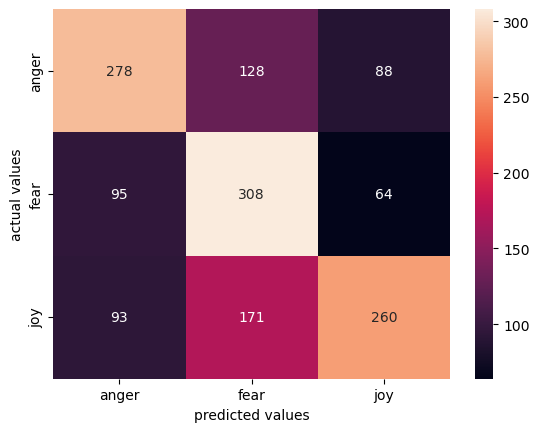

In [10]:
from sklearn.naive_bayes import GaussianNB
naba=GaussianNB()
naba.fit(X_train,y_train)
pred=naba.predict(X_test)

print("GAUSSIAN NAIVE BAYES METHOD ANALYSIS")
print("Accuracy is :",accuracy_score(y_test,pred))
print("Classification report is :")
print(classification_report(y_test,pred))
print("Heat map of confusion matrix is :")
a=y_test.unique()
a.sort()
sns.heatmap(confusion_matrix(y_test,pred),annot=True,xticklabels=a,yticklabels=a,fmt='g')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

SUPPORT VECTOR MACHINE METHOD ANALYSIS
Accuracy is : 0.9252525252525252
Classification report is :
              precision    recall  f1-score   support

       anger       0.93      0.90      0.92       494
        fear       0.95      0.90      0.93       467
         joy       0.90      0.97      0.93       524

    accuracy                           0.93      1485
   macro avg       0.93      0.92      0.93      1485
weighted avg       0.93      0.93      0.93      1485

Heat map of confusion matrix is :


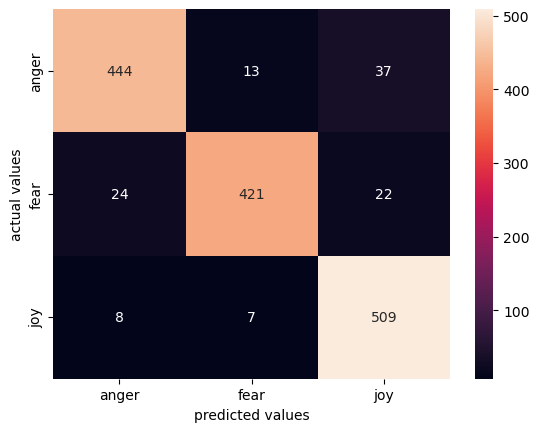

In [11]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
preds=svc.predict(X_test)

print("SUPPORT VECTOR MACHINE METHOD ANALYSIS")
print("Accuracy is :",accuracy_score(y_test,preds))
print("Classification report is :")
print(classification_report(y_test,preds))
print("Heat map of confusion matrix is :")
a=y_test.unique()
a.sort()
sns.heatmap(confusion_matrix(y_test,preds),annot=True,xticklabels=a,yticklabels=a,fmt='g')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [12]:
rep_NB=classification_report(y_test,pred,output_dict=True)
rep_SVM=classification_report(y_test,preds,output_dict=True)

In [13]:
comp=pd.DataFrame(data={'Naive-Bayes':[accuracy_score(y_test,pred)*100,rep_NB['weighted avg']['f1-score'],rep_NB['weighted avg']['precision'],rep_NB['weighted avg']['recall']],
                        'Support Vector Machine':[accuracy_score(y_test,preds)*100,rep_SVM['weighted avg']['f1-score'],rep_SVM['weighted avg']['precision'],rep_SVM['weighted avg']['recall']]},
                        index=['Accuracy Score','f1-score','precision','recall'])
comp

,Naive-Bayes,Support Vector Machine
Accuracy Score,56.969697,92.525253
f1-score,0.569071,0.925108
precision,0.580704,0.926721
recall,0.569697,0.925253


The naive-bayes model shows an accuracy of 57% approx versus the svm model which has a significant better accuracy of 92% approx.
All the parameters including f1-score, precision, recall gives significant advantage to svm against naive-bayes.
It can be confidently said that the SVM model is to be chosen for the given dataset.